# Subquestion 2
### How do neutral-toned articles fit into the path structure? Are they more likely to be used as transitional nodes between positive and negative articles?

In [116]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [117]:
with open("df_paths1.pickle", "rb") as f:
    df = pickle.load(f)

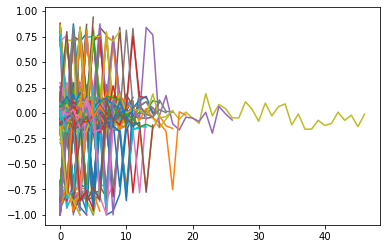

In [118]:
rand_ind = np.random.choice(df.index, size=1000)
for i in rand_ind:
    plt.plot(df.iloc[i]["Scores"])

##### With padding: squeezing all scores in a interval

In [119]:
def pad_path(paths,val=0):
    """
    paths: list of lists
    """
    max_path_length = len(max(paths, key=len))
    for i in range(len(paths)):
        paths[i] = paths[i] + [val]*(max_path_length - len(paths[i]))
    return np.array(paths)

In [120]:
all_paths = pad_path(list(df["Scores"]))

In [121]:
len(max(list(df["Scores"]), key=len))

405

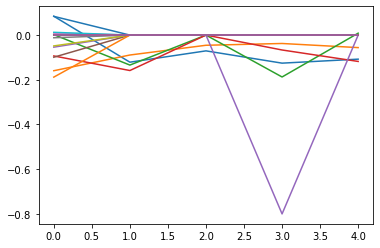

In [122]:
plt.plot(all_paths[np.random.choice(len(all_paths), size=5)])
plt.show()

##### Paths with high mean absolute sentiment

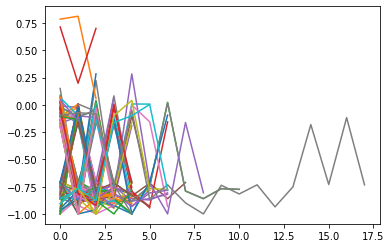

In [123]:
df["Scores_mean"] = df["Scores"].apply(lambda x: sum(x)/len(x))
df["Path_length"] = df["Scores"].apply(lambda x: len(x))
df_high_sentiment = df[(np.abs(df["Scores_mean"]) > 0.5) & (df["Path_length"] > 2)]
rand_ind = np.random.choice(df_high_sentiment.index, size=100)
for i in rand_ind:
    plt.plot(df.loc[i]["Scores"])

Note: many high-sentiment paths are of length 1 or 2. We don't care for these.

In [124]:
np.unique(df[np.abs(df["Scores_mean"]) > 0.5]["Path_length"], return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 18]),
 array([677, 152, 213, 138, 178,  65,  40,  13,   5,   3,   1,   1,   1]))

Observation: many of the high-sentiment paths are negative. Although there seems to be more of the negative articles in the overall wikispeedia game (cf subquest1_1 notebook), here it seems that <b>ONLY</b> negative articles are in the game paths. Either there is a confounder which is the games chosen by the players (but I think we can reasonably assume that the assignment of the game targets and source is random), or the other reason is that players tend to click more on the negative-sentiment articles. This could be a proof of the "people are more attracted to information that shocks" idea. However, could it be simply that the game targets are all negative, hence the need to go through a negative path?

In [125]:
from scipy.interpolate import interp1d

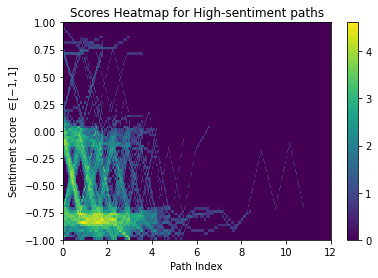

In [203]:
max_path_length = 20
path_resolution = 20  # resolution between 2 articles; e.g. with 20: there are 20 points between source and 1st article clicked
score_resolution = 80 # 20 -> [-1, -0.9, ..., 0.9, 1]
score_step = (1-(-1))/score_resolution

# max_length = df_high_sentiment["Scores"].apply(len).max()  # Get the maximum length of Scores

def path_heatmap(df):
    path_scores_heatmap = np.zeros((score_resolution, path_resolution*max_path_length))

    for i in df.index:
        path = df.loc[i]["Scores"]
        x = np.arange(len(path))
        f = interp1d(x,path)
        path_space = np.linspace(0,len(path)-1, path_resolution*len(path))
        f_path_space = f(path_space)
        for path_ind,score in enumerate(f_path_space):
            y_ind = round(score/score_step) + score_resolution//2
            path_scores_heatmap[y_ind, min(path_ind,path_resolution*max_path_length-1)] += 1

    # Plot the heatmap
    ax = plt.imshow(np.log(np.flipud(path_scores_heatmap)+1), aspect='auto', cmap='viridis', interpolation='nearest', extent=[0,12,-1,1])
    plt.colorbar()
    plt.xlabel('Path Index')
    plt.ylabel('Sentiment score $\in[-1,1]$')
    plt.title('Scores Heatmap for High-sentiment paths')
    plt.show()
    
path_heatmap(df_high_sentiment)

It seems like there are many oscillations in high-sentiment paths. Is it just because we filtered the high-sentiment paths? Or are we just not seeing anything and maybe the oscillations appear while the straight paths don't?

5. How does the sentiment score of a target topic affect the structure and nature of the path chosen by players? Is there a relationship between the extremity of a target article's sentiment (highly positive/negative) and the length of the path taken to reach it? When players choose shorter paths, are these paths characterized by articles with, for example, more extreme sentiment scores?

In [147]:
df

,Scores,Rounded,Target score,Scores_mean,Path_length,target_score_raw
0,"[-0.14721301536458237, -0.028293290087380706, ...","[0, 0, 0, 0, 0, 0, 0, -1, -1]",NaN,-0.204399,9,NaN
1,"[-0.14721301536458237, -0.048477304979667915, ...","[0, 0, 0, -1, -1]",NaN,-0.386558,5,NaN
2,"[-0.14721301536458237, -0.052448976123087784, ...","[0, 0, -1, 0, -1, 0, -1, -1]",NaN,-0.457848,8,NaN
3,"[-0.14721301536458237, 0.037461097698424525, -...","[0, 0, 0, 0]",NaN,-0.020967,4,NaN
4,"[-0.14721301536458237, -0.06396592637112342, 0...","[0, 0, 0, -1, 0, 0, 0]",NaN,-0.177478,7,NaN
...,...,...,...,...,...,...
76159,"[0.011778271523728776, -0.8782995301658347, -0...","[0, -1, 0, -1, -1, 0]",-0.826112,-0.409196,6,-0.826112
76160,[-0.18600953180292576],[0],0.282791,-0.186010,1,0.282791
76161,"[0.7375556848610064, 0.0948245586412504, -0.05...","[1, 0, 0]",0.072405,0.258806,3,0.072405
76162,"[-0.011092642140131198, 0.11030565085346924, -...","[0, 0, -1, -1]",-0.131333,-0.382254,4,-0.131333


Let's gather the target topics scores in a new column. We do this for both the finished and unfinished games.

In [152]:
df["target_score_raw"] = df.apply(lambda x: x['Scores'][-1] if np.isnan(x['Target score']) else x['Target score'], axis=1)
df

,Scores,Rounded,Target score,Scores_mean,Path_length,target_score_raw
0,"[-0.14721301536458237, -0.028293290087380706, ...","[0, 0, 0, 0, 0, 0, 0, -1, -1]",NaN,-0.204399,9,-0.787055
1,"[-0.14721301536458237, -0.048477304979667915, ...","[0, 0, 0, -1, -1]",NaN,-0.386558,5,-0.787055
2,"[-0.14721301536458237, -0.052448976123087784, ...","[0, 0, -1, 0, -1, 0, -1, -1]",NaN,-0.457848,8,-0.787055
3,"[-0.14721301536458237, 0.037461097698424525, -...","[0, 0, 0, 0]",NaN,-0.020967,4,0.080644
4,"[-0.14721301536458237, -0.06396592637112342, 0...","[0, 0, 0, -1, 0, 0, 0]",NaN,-0.177478,7,-0.051500
...,...,...,...,...,...,...
76159,"[0.011778271523728776, -0.8782995301658347, -0...","[0, -1, 0, -1, -1, 0]",-0.826112,-0.409196,6,-0.826112
76160,[-0.18600953180292576],[0],0.282791,-0.186010,1,0.282791
76161,"[0.7375556848610064, 0.0948245586412504, -0.05...","[1, 0, 0]",0.072405,0.258806,3,0.072405
76162,"[-0.011092642140131198, 0.11030565085346924, -...","[0, 0, -1, -1]",-0.131333,-0.382254,4,-0.131333


We want to visualize the paths for paths with high/normal/low target sentiments. We split the dataframe in 3 groups, refining each of the positive/negative target sentiment such that ~1000 games remain.

In [198]:
df_positive = df[(df["target_score_raw"] >= 0.75) & (df["Path_length"] > 2)]
df_neutral = df[(df["target_score_raw"] > -0.5) & (df["target_score_raw"] < 0) & (df["Path_length"] > 2)]
df_negative = df[(df["target_score_raw"] <= -0.9) & (df["Path_length"] > 2)]

In [199]:
df_positive

,Scores,Rounded,Target score,Scores_mean,Path_length,target_score_raw
52,"[-0.18054014173378707, -0.061699661974486814, ...","[0, 0, -1, 0, 0, 0, 1]",NaN,-0.024190,7,0.820768
108,"[-0.12502942793066396, 0.01810045945284644, 0....","[0, 0, 0, 0, 1]",NaN,0.154324,5,0.752251
109,"[-0.12502942793066396, -0.08996913415031234, 0...","[0, 0, 0, 0, 1]",NaN,0.113466,5,0.752251
267,"[-0.0994429734332514, -0.048477304979667915, -...","[0, 0, 0, 0, 0, 0, 0, 1]",NaN,0.099228,8,0.806012
268,"[-0.0994429734332514, 0.029040906630971267, 0....","[0, 0, 0, 0, 1]",NaN,0.197561,5,0.806012
...,...,...,...,...,...,...
75873,"[-0.06755842010711684, -0.061957186049497875, ...","[0, 0, 0]",0.751702,-0.035712,3,0.751702
75972,"[-0.0023716912557069647, -0.048477304979667915...","[0, 0, 0]",0.919213,0.019819,3,0.919213
75985,"[0.09344836651764661, -0.00797732182321273, -0...","[0, 0, 0, 0, 0]",0.811980,-0.059672,5,0.811980
76013,"[0.7575229423822023, 0.18939218392846913, -0.0...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.822314,0.101801,10,0.822314


In [200]:
df_negative

,Scores,Rounded,Target score,Scores_mean,Path_length,target_score_raw
204,"[-0.0994429734332514, -0.9224345433136409, -1.0]","[0, -1, -1]",NaN,-0.673959,3,-1.000000
303,"[0.05698784346450193, -0.029167944125632117, 0...","[0, 0, 0, 0, -1]",NaN,-0.191834,5,-0.935289
312,"[-0.012488160111792684, -0.7815815894491784, -...","[0, -1, -1]",NaN,-0.585733,3,-0.963130
744,"[-0.03734991727984366, -0.09668068843656395, 0...","[0, 0, 0, 0, -1, -1]",NaN,-0.327089,6,-0.956694
940,"[-0.053032830950239654, 0.1387835637953184, 0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]",NaN,-0.009994,12,-0.961910
...,...,...,...,...,...,...
76053,"[0.1388930609552836, 0.03489753465235798, 0.03...","[0, 0, 0, 0, 0]",-0.990095,-0.012282,5,-0.990095
76098,"[-0.7425603899339908, -0.04193485092414588, -0...","[-1, 0, 0]",-0.990095,-0.317530,3,-0.990095
76151,"[-0.17723484359741576, -0.1563196651133706, 0....","[0, 0, 0, 0, 0, 0, -1, -1]",-0.990095,-0.294912,8,-0.990095
76156,"[-0.016125549899415087, -0.8599595314647481, 0...","[0, -1, 0, 0, -1, -1, -1]",-0.945849,-0.458837,7,-0.945849


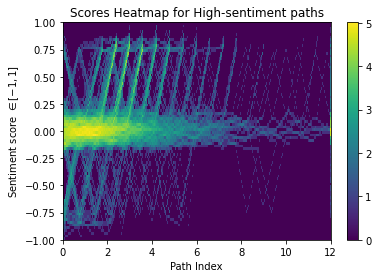

In [204]:
path_heatmap(df_positive)

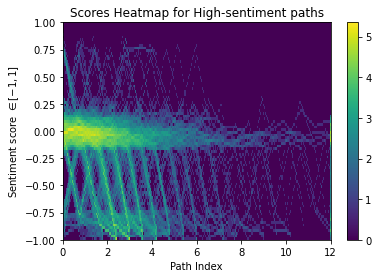

In [205]:
path_heatmap(df_negative)

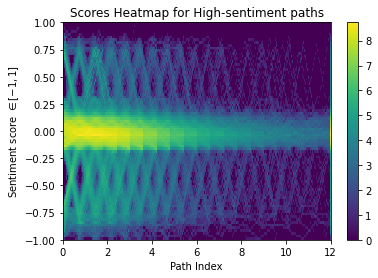

In [206]:
path_heatmap(df_neutral)

In [208]:
df_positive["Path_length"].mean(), df_neutral["Path_length"].mean(), df_negative["Path_length"].mean()

(6.198029556650246, 5.965581141844938, 6.070298769771529)

Seems that paths with higher target topic sentiment are more likely to have longer paths! Let's check that by putting back the length 1 or 2 paths, but removing the unfinished paths.

In [225]:
df_positive = df[(df["target_score_raw"] >= 0.75) & (df["Target score"].isna())]
df_neutral = df[(df["target_score_raw"] > -0.5) & (df["target_score_raw"] < 0) & (df["Target score"].isna())]
df_negative = df[(df["target_score_raw"] <= -0.9) & (df["Target score"].isna())]

In [226]:
df_positive

,Scores,Rounded,Target score,Scores_mean,Path_length,target_score_raw
52,"[-0.18054014173378707, -0.061699661974486814, ...","[0, 0, -1, 0, 0, 0, 1]",NaN,-0.024190,7,0.820768
108,"[-0.12502942793066396, 0.01810045945284644, 0....","[0, 0, 0, 0, 1]",NaN,0.154324,5,0.752251
109,"[-0.12502942793066396, -0.08996913415031234, 0...","[0, 0, 0, 0, 1]",NaN,0.113466,5,0.752251
267,"[-0.0994429734332514, -0.048477304979667915, -...","[0, 0, 0, 0, 0, 0, 0, 1]",NaN,0.099228,8,0.806012
268,"[-0.0994429734332514, 0.029040906630971267, 0....","[0, 0, 0, 0, 1]",NaN,0.197561,5,0.806012
...,...,...,...,...,...,...
51080,"[0.12163939966994172, -0.07282205497450697, -0...","[0, 0, 0, 1, 1]",NaN,0.330688,5,0.766090
51081,"[0.12163939966994172, 0.19585568879977994, -0....","[0, 0, 0, 0, 0, 0, 0, 1, 1]",NaN,0.247335,9,0.766090
51082,"[0.12163939966994172, -0.8599595314647481, -0....","[0, -1, -1, 0, 0, 1]",NaN,-0.133552,6,0.766090
51199,"[-0.11469015087832721, 0.028839342439370058, 0...","[0, 0, 0, 0, 0, 1]",NaN,0.154959,6,0.777598


In [227]:
df_neutral

,Scores,Rounded,Target score,Scores_mean,Path_length,target_score_raw
4,"[-0.14721301536458237, -0.06396592637112342, 0...","[0, 0, 0, -1, 0, 0, 0]",NaN,-0.177478,7,-0.051500
5,"[-0.14721301536458237, -0.048477304979667915, ...","[0, 0, 0, 0, 0, 0]",NaN,-0.045690,6,-0.051500
34,"[-0.14721301536458237, -0.12284976078588936, -...","[0, 0, 0, 0, 0, 0]",NaN,-0.120674,6,-0.142356
35,"[-0.14721301536458237, -0.028293290087380706, ...","[0, 0, 0, 0, 0, 0]",NaN,-0.033658,6,-0.142356
36,"[-0.14721301536458237, 0.07896055512909508, 0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",NaN,-0.036453,14,-0.113131
...,...,...,...,...,...,...
51309,"[-0.07362355382113742, -0.13604068199537295, -...","[0, 0, 0, 0, 0, 0]",NaN,-0.095652,6,-0.026853
51310,"[-0.07362355382113742, -0.09881606549184964, -...","[0, 0, 0, 0, 0]",NaN,-0.065059,5,-0.006431
51313,"[-0.7872493957493736, -0.042444429320800656, -...","[-1, 0, 0]",NaN,-0.313826,3,-0.111785
51314,"[-0.7872493957493736, -0.08028651139427524, -0...","[-1, 0, 0, 0, 0, 0, 0]",NaN,-0.116444,7,-0.020674


In [228]:
df_negative

,Scores,Rounded,Target score,Scores_mean,Path_length,target_score_raw
204,"[-0.0994429734332514, -0.9224345433136409, -1.0]","[0, -1, -1]",NaN,-0.673959,3,-1.000000
303,"[0.05698784346450193, -0.029167944125632117, 0...","[0, 0, 0, 0, -1]",NaN,-0.191834,5,-0.935289
312,"[-0.012488160111792684, -0.7815815894491784, -...","[0, -1, -1]",NaN,-0.585733,3,-0.963130
744,"[-0.03734991727984366, -0.09668068843656395, 0...","[0, 0, 0, 0, -1, -1]",NaN,-0.327089,6,-0.956694
940,"[-0.053032830950239654, 0.1387835637953184, 0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]",NaN,-0.009994,12,-0.961910
...,...,...,...,...,...,...
50853,"[0.06922466557592508, 0.7868288192327872, 0.03...","[0, 1, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, -1, -1]",NaN,-0.175092,14,-0.929232
50949,"[0.008209468903888517, -0.8599595314647481, -0...","[0, -1, 0, -1, 0, 0, -1]",NaN,-0.422552,7,-1.000000
50952,"[-0.020643576133700686, -0.06738292318862259, ...","[0, 0, 0, -1, 1, 0, -1, -1, -1]",NaN,-0.350729,9,-0.945849
51100,"[-0.06369720605805351, -0.7332200721932602, -0...","[0, -1, 0, 0, -1, -1]",NaN,-0.438278,6,-0.944469


Notice negative paths lose more paths. Maybe players abandon more when given negative targets?

In [229]:
df_positive["Path_length"].mean(), df_neutral["Path_length"].mean(), df_negative["Path_length"].mean()

(6.173754556500607, 5.938561594077559, 6.17710843373494)

Now the difference is even more pronounced. It seems that paths with higher target absolute sentiment are more likely to be longer. However, the mean is not robust. Let's investigate more.

Let us check this with histogram visualizations now. Then we can do a statistical test. (note that we removed a possible confounder: whether a path is finished or not, by not include unfinished paths)

We want to do a t-test. But first we check if the path length distributions are Gaussian-distributed (an important assumption of the t-test).

(array([5.43158623e-02, 1.32260855e-01, 1.10430721e-02, 1.68137001e-03,
        2.59470680e-04, 6.22729632e-05, 1.72980453e-05, 2.07576544e-06]),
 array([  0,   5,  10,  15,  20,  30,  40,  50, 100]),
 <BarContainer object of 8 artists>)

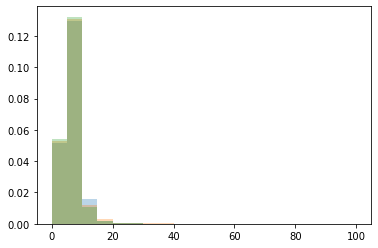

In [232]:
bins=[0, 5, 10, 15, 20, 30, 40, 50, 100]

plt.hist(df_positive["Path_length"], alpha=0.3, density=1, bins=bins)
plt.hist(df_negative["Path_length"], alpha=0.3, density=1, bins=bins)
plt.hist(df_neutral[df_neutral["Path_length"] < 100]["Path_length"], alpha=0.3, density=1, bins=bins)

(array([1.32787608e-01, 2.58801078e-02, 2.05902539e-03, 3.40380892e-04,
        1.28340336e-04, 5.02201316e-05, 1.67400439e-05, 1.11600292e-05,
        1.11600292e-05, 5.58001462e-06]),
 array([ 1. ,  7.2, 13.4, 19.6, 25.8, 32. , 38.2, 44.4, 50.6, 56.8, 63. ]),
 <BarContainer object of 10 artists>)

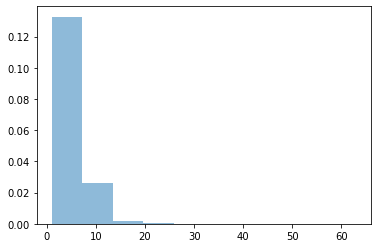

In [223]:
plt.hist(df_neutral[df_neutral["Path_length"] < 100]["Path_length"], alpha=0.5, density=1)